In [1]:
from google.colab import files
files.upload() # kaggle.jsonをアップロード
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


  0% 0.00/14.8k [00:00<?, ?B/s]
100% 14.8k/14.8k [00:00<00:00, 29.4MB/s]
Archive:  parkinson-disease-detection.zip
  inflating: Parkinsson disease.csv  
               name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  ...   spread2        D2       PPE
0    phon_R01_S01_1      119.992       157.302  ...  0.266482  2.301442  0.284654
1    phon_R01_S01_2      122.400       148.650  ...  0.335590  2.486855  0.368674
2    phon_R01_S01_3      116.682       131.111  ...  0.311173  2.342259  0.332634
3    phon_R01_S01_4      116.676       137.871  ...  0.334147  2.405554  0.368975
4    phon_R01_S01_5      116.014       141.781  ...  0.234513  2.332180  0.410335
..              ...          ...           ...  ...       ...       ...       ...
190  phon_R01_S50_2      174.188       230.978  ...  0.121952  2.657476  0.133050
191  phon_R01_S50_3      209.516       253.017  ...  0.129303  2.784312  0.168895
192  phon_R01_S50_4      174.688       240.005  ...  0.158453  2.679772  0.131728
193  phon_R01_S50_5      19

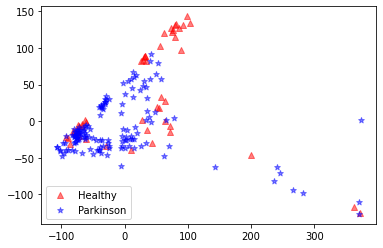

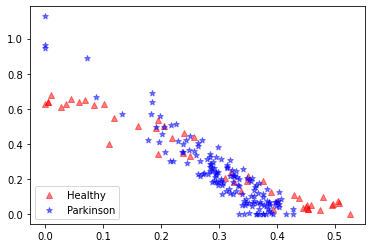

In [2]:
import pandas as pd
import numpy as np
# 主成分分析(PCA)を使用するためインポート
from sklearn.decomposition import PCA
# 非負値行列因子分解(NMF)を使用するためインポート
from sklearn.decomposition import NMF
# 正規化のためにインポート
from sklearn.preprocessing import MinMaxScaler
# 可視化用にインポート
import matplotlib.pyplot as plt
%matplotlib inline

# データの準備
!kaggle datasets download -d debasisdotcom/parkinson-disease-detection
!unzip parkinson-disease-detection.zip
df = pd.read_csv('Parkinsson disease.csv')
print(df)
# 数値でない'name'の列を削除
df.drop('name', axis=1, inplace=True)
X1 = df[ df['status'] == 0 ].values
X2 = df[ df['status'] == 1 ].values

# PCAの実行(次元数をn_componentsで指定）
pca = PCA(n_components=2, random_state=1)
X = pca.fit(df.values)
X1 = pca.transform(X1)
X2 = pca.transform(X2)
# 可視化
plt.scatter(X1[:,0], X1[:,1], c='red', marker='^', alpha=0.5)
plt.scatter(X2[:,0], X2[:,1], c='blue', marker='*', alpha=0.5)
plt.legend(('Healthy', 'Parkinson' ), loc=3)
plt.savefig('PCA_disease.png', dpi=500)
plt.show()

# NMFの実行(次元数をn_componentsで指定）
# 非負値を含まないように正規化してから実行
X = df.values
X1 = df[ df['status'] == 0 ].values
X2 = df[ df['status'] == 1 ].values
ms = MinMaxScaler()
ms.fit(X)
X1 = ms.transform(X1)
X2 = ms.transform(X2)
nmf = NMF(n_components=2, max_iter=300, random_state=1)
# 行列H1,H2は次元削減後の特徴量行列
# 行列W1,W2はデータを線形近似するための基底行列
nmf.fit(X1)
H1 = nmf.transform(X1)
W1 = nmf.n_components_
nmf.fit(X2)
H2 = nmf.transform(X2)
W2 = nmf.n_components_

# 可視化
plt.scatter(H1[:,0], H1[:,1], c='red', marker='^', alpha=0.5)
plt.scatter(H2[:,0], H2[:,1], c='blue', marker='*', alpha=0.5)
plt.legend(('Healthy', 'Parkinson' ), loc=3)
plt.savefig('NMF_disease.png', dpi=500)
plt.show()

